In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

df1 = pd.read_csv('Train.csv')
df2 = pd.read_csv('Test.csv')
df3 = pd.read_csv('Valid.csv')

data1 = df1.append(df2)
data = data1.append(df3)
data.head()

C:\Users\Tajammul\AppData\Local\Temp\ipykernel_12484\3491301417.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1 = df1.append(df2)
C:\Users\Tajammul\AppData\Local\Temp\ipykernel_12484\3491301417.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data1.append(df3)


,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


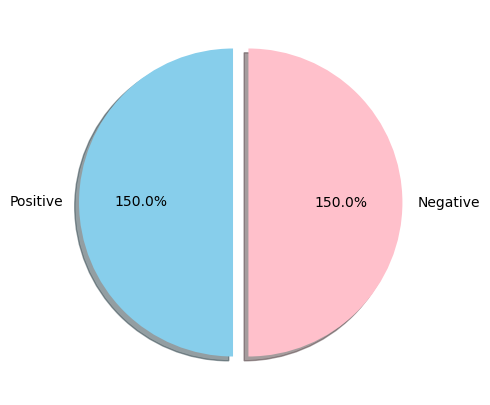

In [6]:
fig = plt.figure(figsize=(5, 5))
colors = ['skyblue', 'pink']
pos = data[data['label'] == 1]
neg = data[data['label'] == 0]

ck = [pos['label'].count(), neg['label'].count()]
legpie = plt.pie(ck, labels = ['Positive', 'Negative'],
                autopct = '1%1.1f%%',
                shadow = True,
                colors = colors,
                startangle = 90,
                explode = (0, 0.1))

In [9]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emojis).replace('-', '')
    return text

In [10]:
data['text'] = data['text'].apply(preprocessor)

In [11]:
data.text.head()

0    i grew up b 1965 watching and loving the thund...
1    when i put this movie in my dvd player and sat...
2    why do people who do not know what a particula...
3    even though i have great interest in biblical ...
4    im a die hard dads army fan and nothing will e...
Name: text, dtype: object

In [13]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = stopwords.words('english')


from wordcloud import WordCloud
positiveData = data[data['label'] == 1]
positiveData = positiveData['text']
negativeData = data[data['label'] == 0]
negativeData = negativeData['text']


def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = ' '.join([word for word in words.split() if (word != 'movie' and word != 'film')])
    
    wordcloud = WordCloud(stopwords = stopWords,
                          background_color = color,
                          width = 2500,
                          height = 2500
                         ).generate(cleaned_word)
    
    plt.figure(1, figsize = (10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tajammul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive words are as follows: 



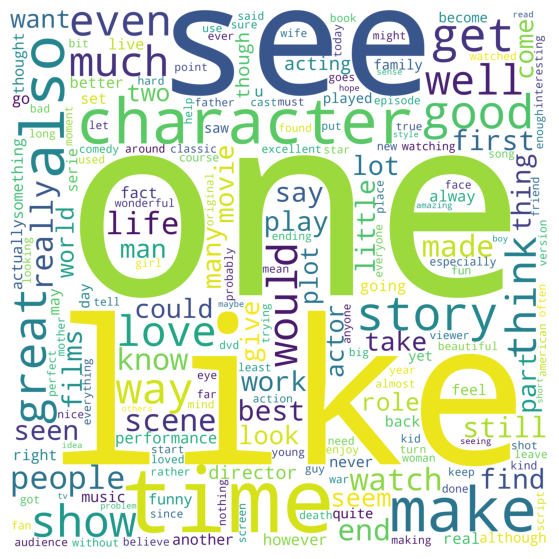

Negative words are as follows: 



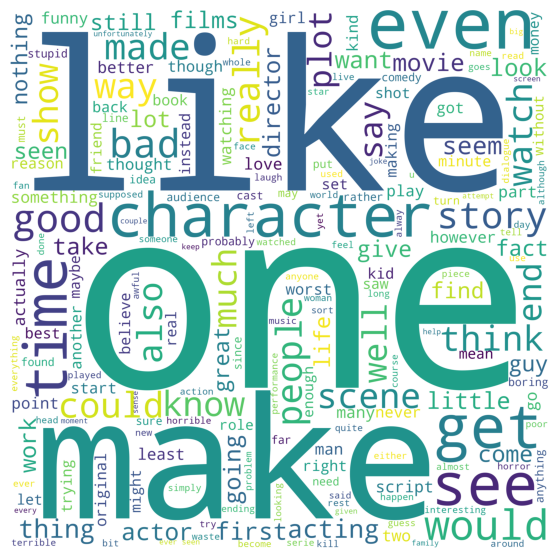

In [18]:
print('Positive words are as follows: \n')
wordcloud_draw(positiveData, 'white')

print('Negative words are as follows: \n')
wordcloud_draw(negativeData)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents = None, lowercase = False, preprocessor = None, tokenizer = tokenizer_porter, use_idf = True, norm = 'l2', smooth_idf = True)
y = data.label.values
x = tfidf.fit_transform(data.text)

C:\Users\Tajammul\anaconda3\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.2)

In [24]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=6, scoring='accuracy', random_state=0, n_jobs=-1, verbose=3, max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

# Model Accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:  4.5min remaining:  9.0min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  6.9min finished


Accuracy:  0.8969
